Practica 4

Enunciado:


Debido a un aumento en las ventas, cierta compañía productora necesita mas espacio en su fábrica. La solución que se ha propuesto es la construcción de un nuevo depósito para almacenar los productos terminados. Este depósito estará localizado a 35 kilómetros de la planta. Además, de acuerdo con este nuevo plan, se requiere que al final del día se envíe la producción terminada al nuevo depósito.

Con base en información histórica, se ha estimado que la producción diaria de la empresa tiene la siguiente distribución de probabilidad:

Producción diaria (toneladas)	Probabilidad
50-55	0.1
55-60	0.15
60-65	0.3
65-70	0.35
70-75	0.08
75-80	0.02
 

También se sabe que el tipo de camiones que se deben utilizar para transportar esta producción tiene capacidad de 5 toneladas. La cantidad de viajes que se pueden realizar cada día (jornada de 8 horas), depende del tiempo de carga y descarga, como también del tiempo que se requiere para recorrer la distancia entre la planta y el depósito. Por lo tanto, la cantidad de producto terminado que un camión puede transportar de la planta al depósito es una variable aleatoria que toma valores entre 4 y 6 toneladas, siendo 5 el valor más frecuente.

Si la cantidad diaria producida es mayor que la cantidad que puede transportar la flotilla de camiones, el excedente debe ser enviado a través de camiones de otra compañía transportadora a un costo de $20000 la tonelada. Además el costo promedio anual de un camión nuevo es de $ 20 000 000. Si se trabajan 250 días al año,


¿Cuál es el número óptimo de camiones que la empresa debe comprar?

Actividades:

Crear un programa en Python o Excel que calcule las utilidades anuales promedio asumiendo un número dado de camiones comprados. En el programa deben usarse las técnicas de transformada inversa vistas en clase.
Realizar 500 simulaciones o más, asumiendo distintas cantidades de camiones comprados y determinar  el número de camiones que minimiza los costos anuales promedio.
A partir del número  óptimo de camiones:
Realizar un histograma de los costos anuales y analizarlo.
Calcular estadísticas descriptivas de los costos anuales: mínimo, máximo, media, mediana y desviación estándar e interpretarlas.
Calcular un intervalo de confianza para el promedio de los costos, considerando un valor de significancia de 5%.

In [1]:
import random
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t



In [2]:
def triangulo(ei,moda,ed):
  a=ei
  b=ed
  c=moda
  r=random.random()
  #para x entre a y c, r=(x-a)^2/(b-a)(c-a)
  #si x=a, r=0
  #si x=c, r=(c-a)/(b-a)
  r1=(c-a)/(b-a)
  #print(r)
  if r <=r1:
    o=a+math.sqrt(r*(b-a)*(c-a))
  else :
    o=b-math.sqrt((1-r)*(b-a)*(b-c))
  return(o)

producción_tercerosprecio = 20000
newTruckPrice = 20000000
daysOfSimulation = 250

def getProduction():
  r = random.random();
  if r <= 0.1:
    x=50+r*(55-50)
    return x
  elif r <= 0.25:
    x=55+r*(60-55)
    return x
  elif r <= 0.55:
    x=60+r*(65-60)
    return x
  elif r <= 0.9:
    x=65+r*(70-65)
    return x
  elif r <= 0.98:
    x=70+r*(75-70)
    return x
  else:
    x=75+r*(80-75)
    return x
  return 0 #para que no saque error la funcion

def capacidad_camion():
  return triangulo(4,5,6)


def costo_transporte(trucksAmount):
  Production = getProduction()
  productionOwn = 0
  for i in range(0, trucksAmount):
    productionOwn += capacidad_camion()
  producción_terceros = Production - productionOwn;
  if producción_terceros < 0:
    return 0
  else:
    return producción_terceros * producción_tercerosprecio

def cost_año_trans(trucksAmount):
  cost = 0
  for i in range(0, daysOfSimulation):
    cost += costo_transporte(trucksAmount)
  return cost


def dif_cant_camiones(cantidad_camiones_existentes, cant_max_Camiones_Nuevos):
  simulations = 500                                                    #simulaciones a usar 
  data = []
  for cant_Camiones_Nuevos in range (0, cant_max_Camiones_Nuevos):
    results = []
    for j in range(0, simulations):
      results += [cost_año_trans(cantidad_camiones_existentes + cant_Camiones_Nuevos+1) + ((cant_Camiones_Nuevos+1)*newTruckPrice)]
    simulationDataFrame = pd.DataFrame(results)
    data += [{
        "truckAmount": cantidad_camiones_existentes + cant_Camiones_Nuevos+1,
        "newTrucks": cant_Camiones_Nuevos+1,
        "max": simulationDataFrame.max(),
        "min": simulationDataFrame.min(),
        "median": simulationDataFrame.median(),
        "mean": simulationDataFrame.mean(),
        "std": simulationDataFrame.std(),
        "results": simulationDataFrame
        }]
  return data

cantidad_camiones_existentes = 6
cant_max_Camiones_Nuevos = 20
summary = dif_cant_camiones(cantidad_camiones_existentes, cant_max_Camiones_Nuevos)
DataFrame = pd.DataFrame(summary)

stadísticas descriptivas de los costos anuales: mínimo, máximo, media, mediana y desviación estándar e interpretarlas

In [ ]:
DataFrame.head(20)

histograma

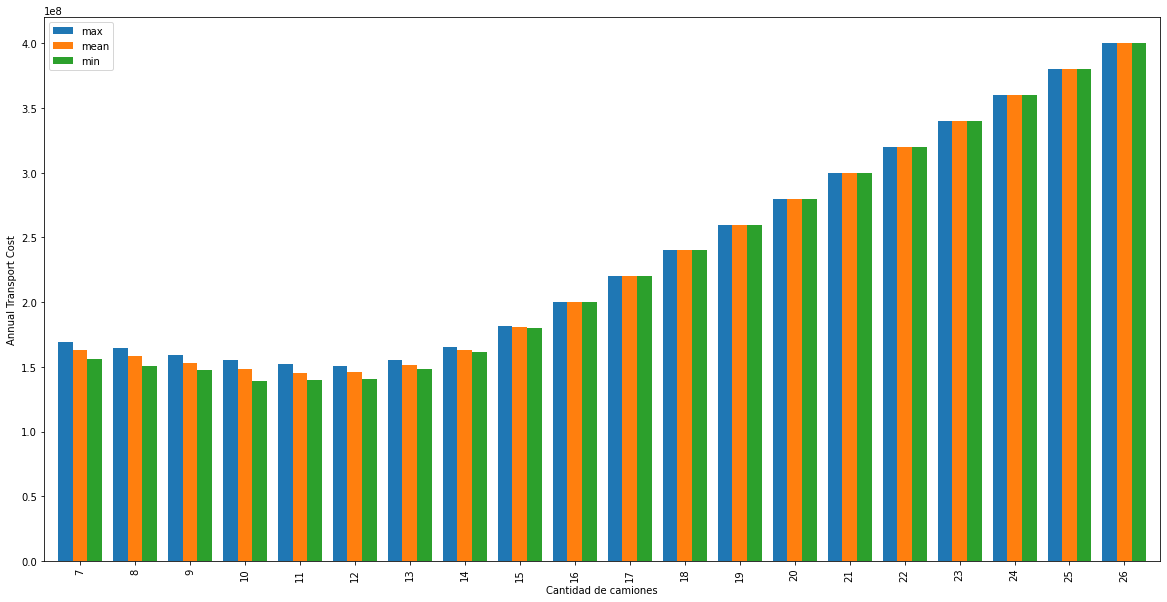

In [ ]:
plt.rcParams["figure.figsize"] = [20, 10]

DataFrame["max"] = DataFrame["max"].astype("float")
DataFrame["mean"] = DataFrame["mean"].astype("float")
DataFrame["min"] = DataFrame["min"].astype("float")


DataFrame.plot(x="truckAmount", y=["max", "mean", "min"], kind="bar", width=0.8, xlabel="Cantidad de camiones" ,ylabel="Annual Transport Cost")

In [ ]:
resumen_num_Camiones = pd.DataFrame([x for x in summary if x["truckAmount"] == 11][0]["results"]) #Obtener datos de las simulacion para la cantidad de 11 camiones

confidence = 0.95
media = resumen_num_Camiones.mean()
std = resumen_num_Camiones.std()
n = len(resumen_num_Camiones)
std_err = sem(resumen_num_Camiones)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)      # Calculamos el intervalo de confianza

lim_inf = media - h
lim_sup = media + h
print ("Intervalo de confianza para los costos anuales: ",int(round(lim_inf,2)), " -- ", int(round(lim_sup,2)))

Intervalo de confianza para los costos anuales:  145385380  --  145745926
